# Модуль A

## Предобработка данных

In [ ]:
import pandas as pd

data = pd.read_csv('MaintenanceR.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Unnamed: 14
0,1,M14860,M,"298,1","308,6",1551,"42,8",0,0,0,0,0,0,0,NaN
1,2,L47181,L,"298,2","308,7",1408,"46,3",3,0,0,0,0,0,0,NaN
2,3,L47182,L,"298,1","308,5",1498,"49,4",5,0,0,0,0,0,0,NaN
3,4,L47183,L,"298,2","308,6",1433,"39,5",7,0,0,0,0,0,0,NaN
4,5,L47184,L,"298,2","308,7",1408,"40,0",9,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,"298,8","308,4",1604,"29,5",14,0,0,0,0,0,0,NaN
9996,9997,H39410,H,"298,9","308,4",1632,"31,8",17,0,0,0,0,0,0,NaN
9997,9998,M24857,M,"299,0","308,6",1645,"33,4",22,0,0,0,0,0,0,NaN
9998,9999,H39412,H,"299,0","308,7",1408,"48,5",25,0,0,0,0,0,0,NaN


In [ ]:
data = data.drop(['Unnamed: 14'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   UDI                      10000 non-null  int64 
 1   Product ID               10000 non-null  object
 2   Type                     10000 non-null  object
 3   Air temperature [K]      10000 non-null  object
 4   Process temperature [K]  10000 non-null  object
 5   Rotational speed [rpm]   10000 non-null  int64 
 6   Torque [Nm]              10000 non-null  object
 7   Tool wear [min]          10000 non-null  int64 
 8   Machine failure          10000 non-null  int64 
 9   TWF                      10000 non-null  int64 
 10  HDF                      10000 non-null  int64 
 11  PWF                      10000 non-null  int64 
 12  OSF                      10000 non-null  int64 
 13  RNF                      10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.

Проверка на пропуски

In [ ]:
data.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


Пропусков в данных нет

Проверим данные на дубликаты

In [ ]:
data = data.drop_duplicates()
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,"298,1","308,6",1551,"42,8",0,0,0,0,0,0,0
1,2,L47181,L,"298,2","308,7",1408,"46,3",3,0,0,0,0,0,0
2,3,L47182,L,"298,1","308,5",1498,"49,4",5,0,0,0,0,0,0
3,4,L47183,L,"298,2","308,6",1433,"39,5",7,0,0,0,0,0,0
4,5,L47184,L,"298,2","308,7",1408,"40,0",9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,"298,8","308,4",1604,"29,5",14,0,0,0,0,0,0
9996,9997,H39410,H,"298,9","308,4",1632,"31,8",17,0,0,0,0,0,0
9997,9998,M24857,M,"299,0","308,6",1645,"33,4",22,0,0,0,0,0,0
9998,9999,H39412,H,"299,0","308,7",1408,"48,5",25,0,0,0,0,0,0


Дубликатов нет

Изменим типы столбцов Air temperature [K],	Process temperature [K] и Torque [Nm] на float

In [ ]:
cols_to_float = ['Air temperature [K]',	'Process temperature [K]', 'Torque [Nm]']
for c in cols_to_float:
  col_values = data[c].to_list()
  new_col_values = []
  for v in col_values:
    new_col_values.append(float(v.replace(',', '.')))
  data[c] = new_col_values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Заменим значения type на числа: H: 0, L: 1, M: 2

In [ ]:
data['Type'] = data['Type'].replace({'H': 0, 'L': 1, 'M': 2})
data['Type']

<ipython-input-6-2826860018>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Type'] = data['Type'].replace({'H': 0, 'L': 1, 'M': 2})


,Type
0,2
1,1
2,1
3,1
4,1
...,...
9995,2
9996,0
9997,2
9998,0


## Исследовательский анализ данных

Обработка выбросов

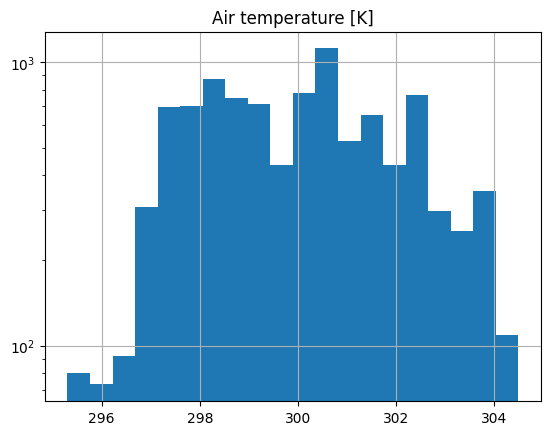

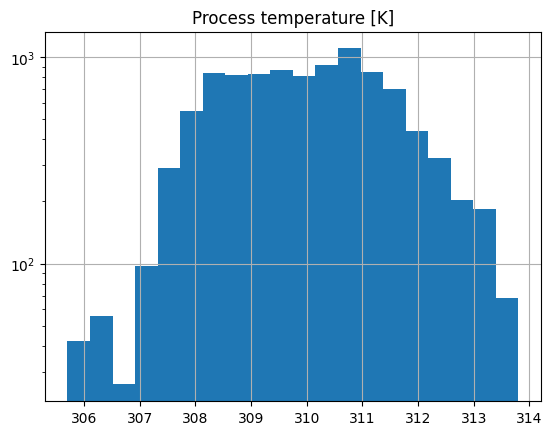

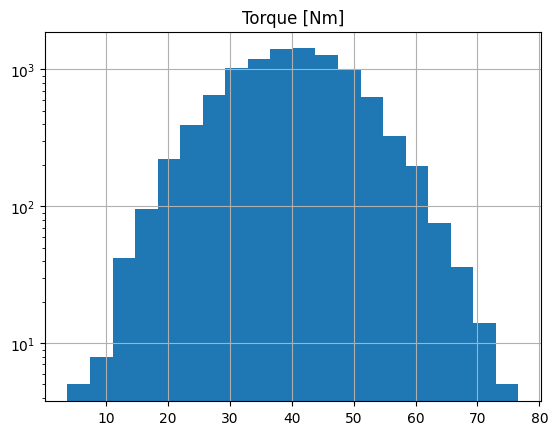

In [ ]:
from matplotlib import pyplot as plt

cols = ['Air temperature [K]',	'Process temperature [K]',	'Torque [Nm]']
for c in cols:
  data.hist(c, log=True, bins=20)

Данные распределены нормально.

Выбросы наблюдаются в Air Temperature, Process Temperature

In [ ]:
data_with_outliers = data[['Air temperature [K]',	'Process temperature [K]']]

q1 = data_with_outliers.quantile(0.25)
q3 = data_with_outliers.quantile(0.75)

iqr = q3 - q1

data_filtered = data[~((data_with_outliers < q1 - 1.5 * iqr) | (data_with_outliers > q3 + 1.5 * iqr)).any(axis=1)]

data_filtered

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Гистограммы данных без выбросов

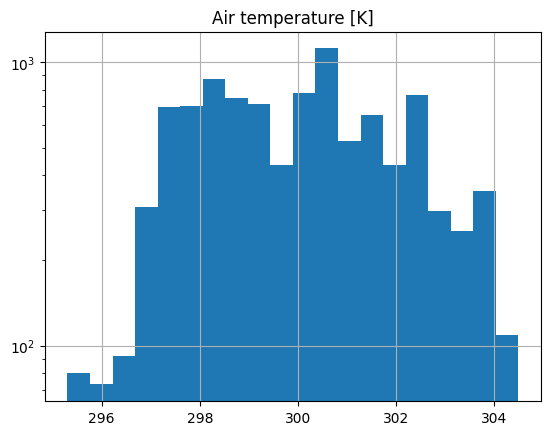

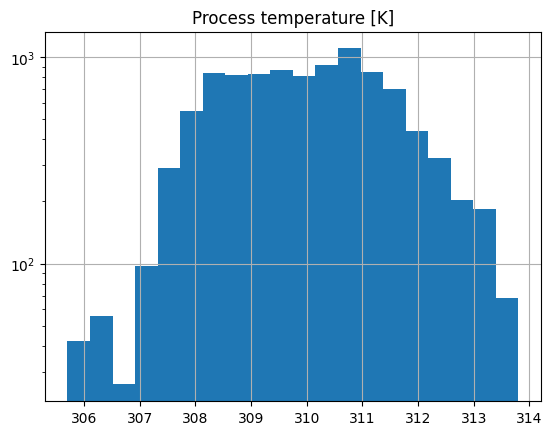

In [ ]:
cols = ['Air temperature [K]',	'Process temperature [K]']
for c in cols:
  data_filtered.hist(c, log=True, bins=20)

In [ ]:
data_filtered.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Рассмотрим, насколько сильно зависит целевая переменная Rotational Speed от различных признаков

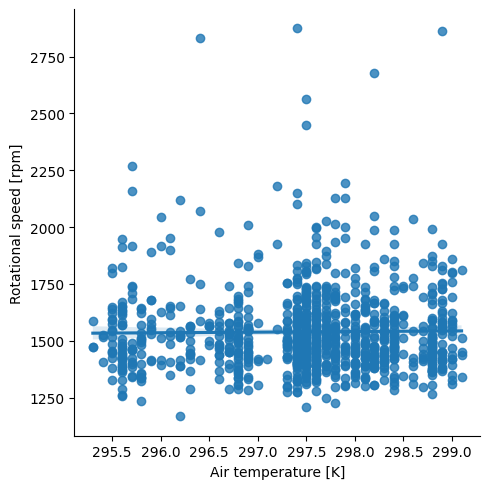

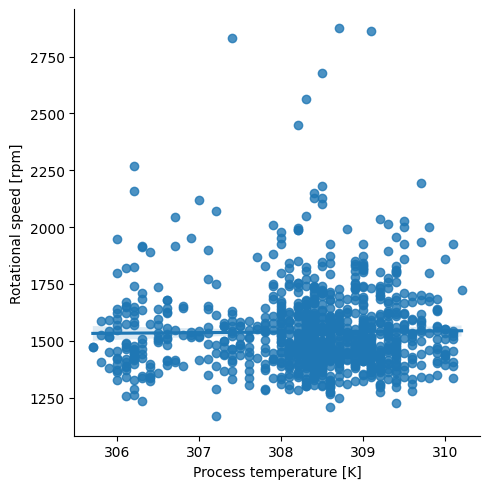

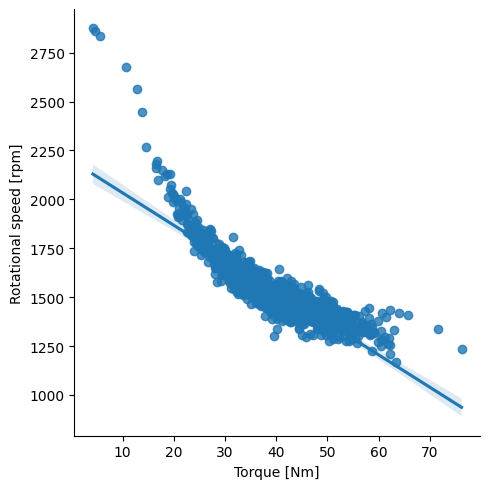

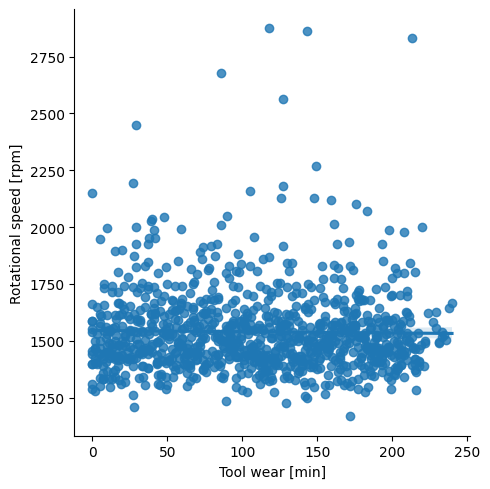

In [ ]:
import seaborn as sns

float_cols = ['Air temperature [K]',	'Process temperature [K]',	'Torque [Nm]',	'Tool wear [min]']

for c in float_cols:
  sns.lmplot(data_filtered[:1000], x=c, y='Rotational speed [rpm]')

 Очевидно, что наибольшее влияние на скорость вращения оказывает крутящий момент.

 Остальные вещественные признаки практически не влияют на скорость вращения.

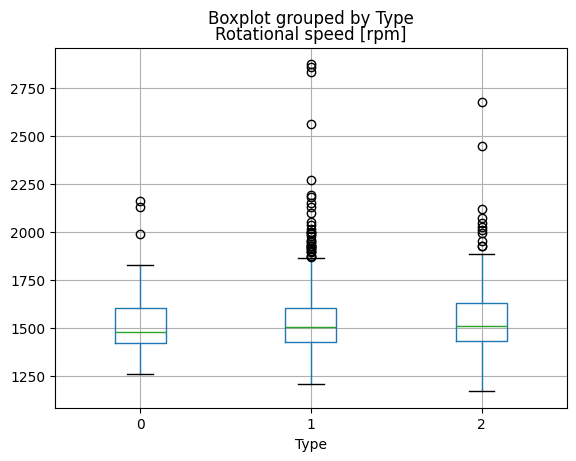

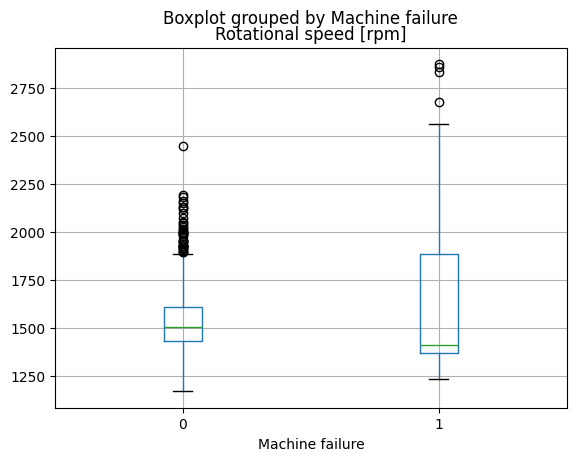

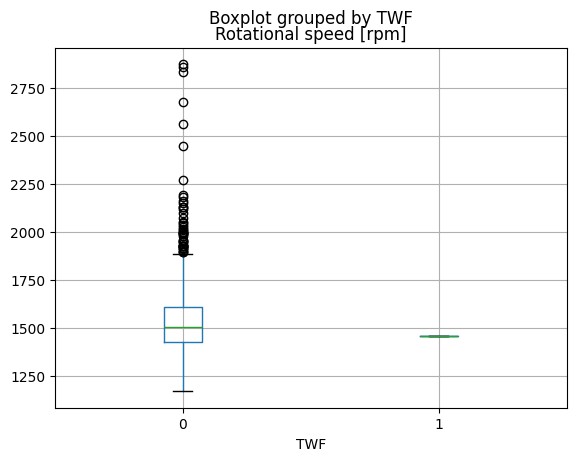

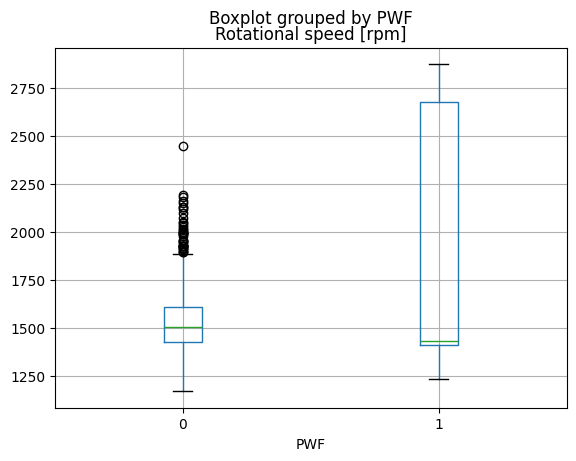

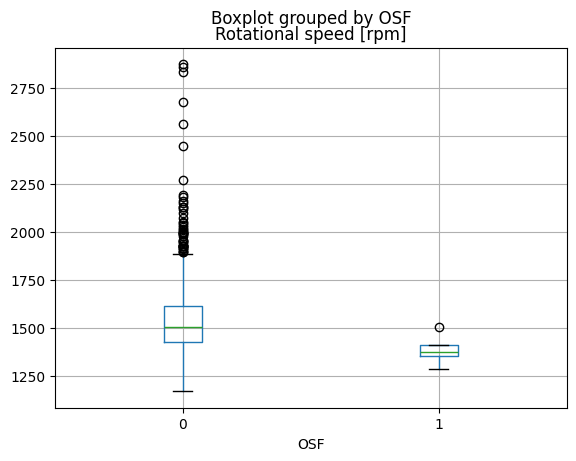

In [ ]:
cat_cols = ['Type', 'Machine failure',	'TWF',	'PWF',	'OSF']

for c in cat_cols:
  data_filtered[:1000].boxplot(by=c, column='Rotational speed [rpm]')

Заметим, что уменьшение крутящего момента чаще всего возникает из-за поломки машины в целом, отказа питания и перенапряжения.

Столбцы RNF и HDF не учитывались, так как после удаления выбросов все значения этих столбцов стали равны 0.

Корреляция между числовыми признаками:

<Axes: >

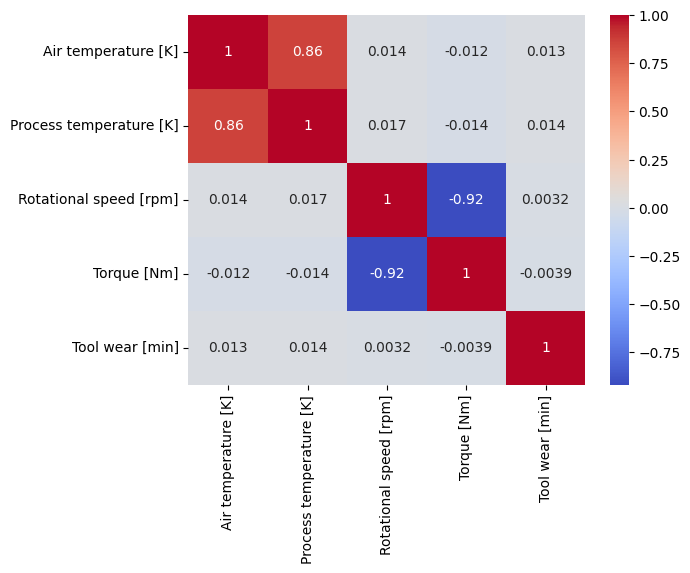

In [ ]:
сols_to_float_corr = ['Air temperature [K]',	'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]',	'Tool wear [min]']
data_to_float_corr = data[сols_to_float_corr]

sns.heatmap(data_to_float_corr.corr(method='spearman'), annot = True, cmap='coolwarm')

Корреляция между числовыми/категориальными признаками:

<Axes: >

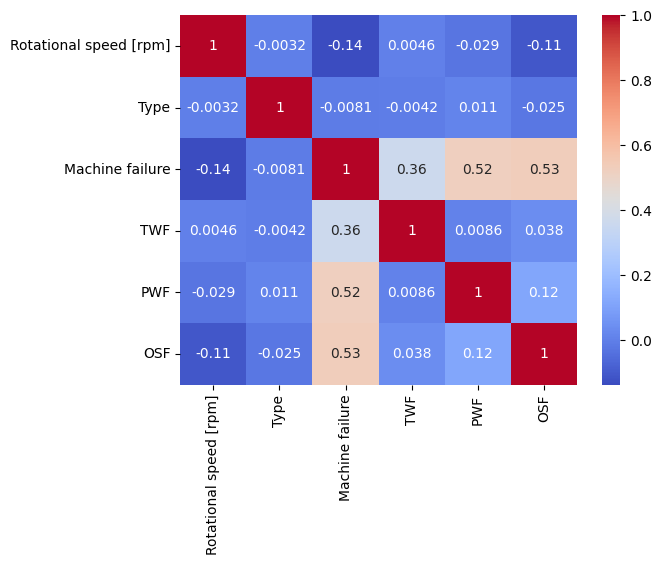

In [ ]:
сols_to_int_corr = ['Rotational speed [rpm]', 'Type', 'Machine failure',	'TWF',	'PWF',	'OSF']
data_to_int_corr = data[сols_to_int_corr]

sns.heatmap(data_to_int_corr.corr(method='kendall'), annot = True, cmap='coolwarm')


In [ ]:
data_filtered.to_csv('rotation_prepared.csv')